In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#información disponible de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


1.Examinarla distribución general del total de la factura para entender cómo se comportan las ventas en todo el restaurante.

2.Analizar cómo varía la propina según el monto total, para entender patrones de comportamiento del cliente.

3.Explorar varias variables numéricas como total_bill, tip y size para descubrir posibles interacciones.

4.Visualizarla relación lineal entre el total y la propina para confirmar si hay correlación.

5.Comparar el promedio del total de la factura según el día para verificar si los viernes efectivamente bajan las ventas.

6.Observar cuántas transacciones ocurren en cada día, detectando si la cantidad de clientes varía.

7.Observarla dispersión y outliers del total por día para detectar variabilidad

8.Cruzar variables numéricas para identificar relaciones fuertes.

9.comparar la distribución del total según el sexo y turno para entender mejor comportamientos específicos.

10.crear una grilla personalizada para observar múltiples relaciones entre variables.

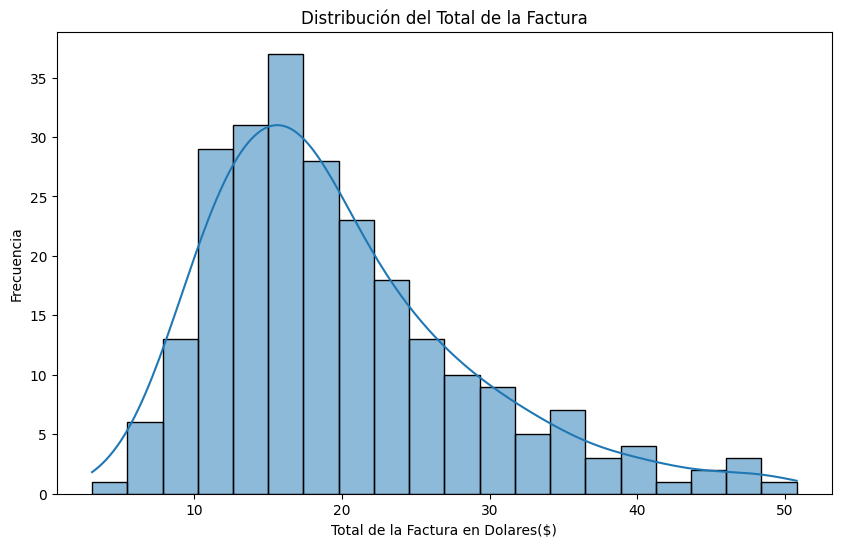

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True, bins=20)
plt.title('Distribución del Total de la Factura')
plt.xlabel('Total de la Factura en Dolares($)')
plt.ylabel('Frecuencia')
plt.show()

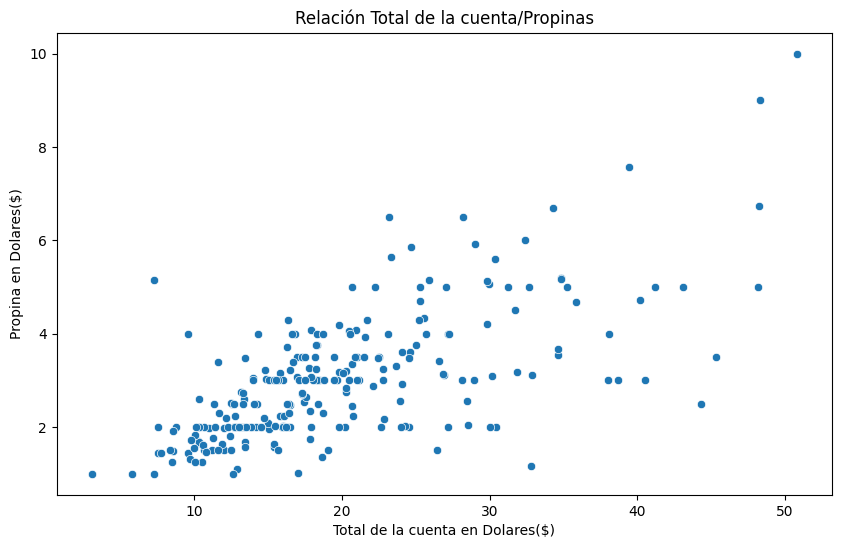

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#2.Analizar cómo varía la propina según el monto total, para entender patrones de comportamiento del cliente.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relación Total de la cuenta/Propinas')
plt.xlabel('Total de la cuenta en Dolares($)')
plt.ylabel('Propina en Dolares($)')
plt.show()
plt

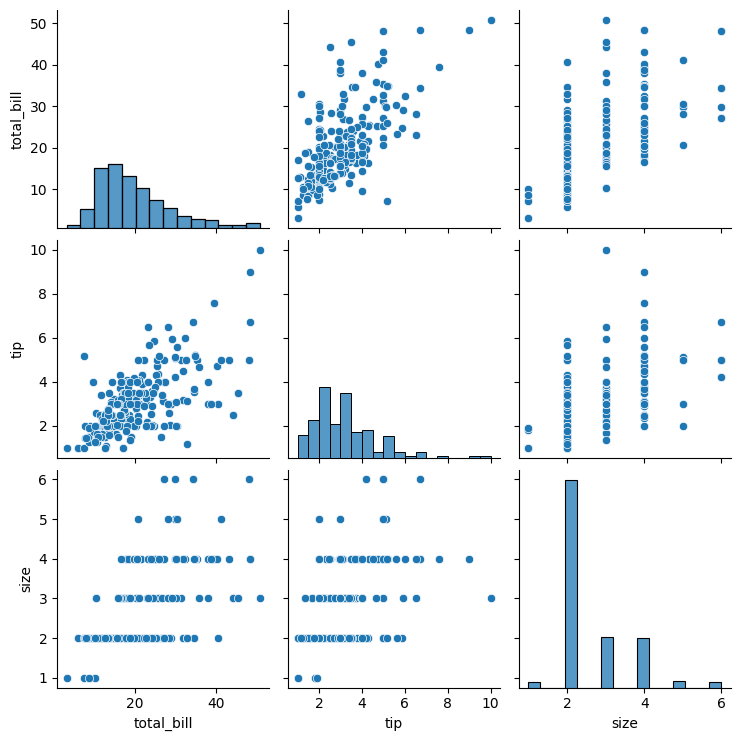

La relación más evidente es del total de la cuenta y la propina


In [ ]:
#3.Explorar varias variables numéricas como total_bill, tip y size para descubrir posibles interacciones.
sns.pairplot(df, vars=['total_bill', 'tip', 'size'])
plt.show()
print("La relación más evidente es del total de la cuenta y la propina")

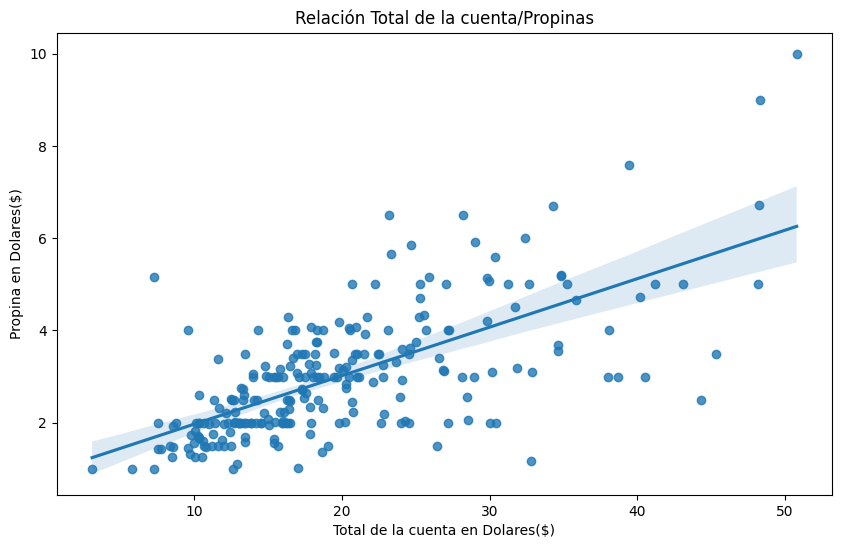

In [ ]:
#4.Visualizarla relación lineal entre el total y la propina para confirmar si hay correlación.
plt.figure(figsize=(10, 6))
sns.regplot(x='total_bill', y='tip', data=df)
plt.title('Relación Total de la cuenta/Propinas')
plt.xlabel('Total de la cuenta en Dolares($)')
plt.ylabel('Propina en Dolares($)')
plt.show()

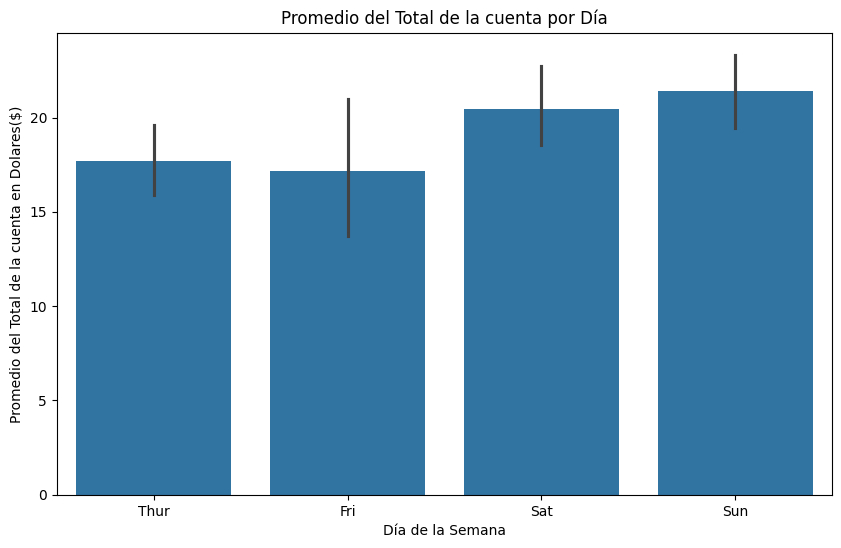

In [ ]:
#5.Comparar el promedio del total de la factura según el día para verificar si los viernes efectivamente bajan las ventas.
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='total_bill', data=df)
plt.title('Promedio del Total de la cuenta por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio del Total de la cuenta en Dolares($)')
plt.show()
#

Text(0, 0.5, 'Cantidad de Transacciones')

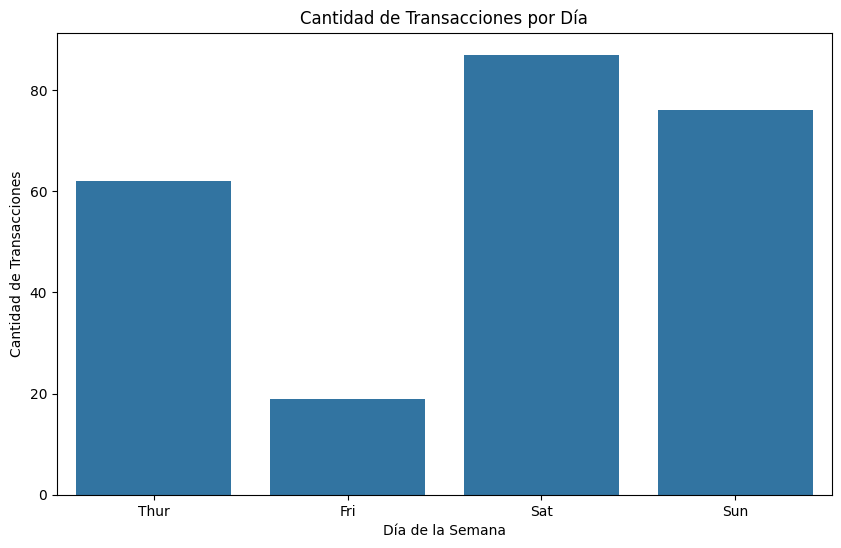

In [ ]:
#6.Observar cuántas transacciones ocurren en cada día, detectando si la cantidad de clientes varía.
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=df)
plt.title('Cantidad de Transacciones por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Transacciones')

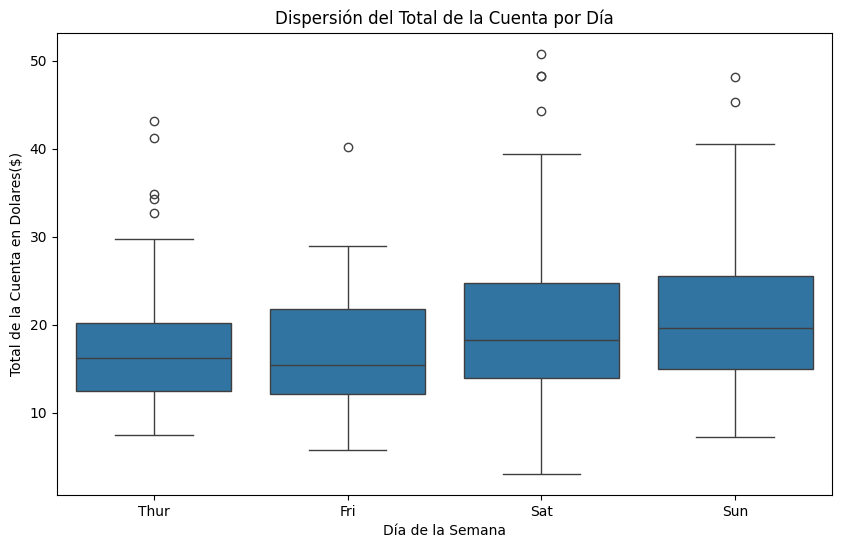

In [ ]:
#7.Observarla dispersión y outliers del total por día para detectar variabilidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Dispersión del Total de la Cuenta por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de la Cuenta en Dolares($)')
plt.show()

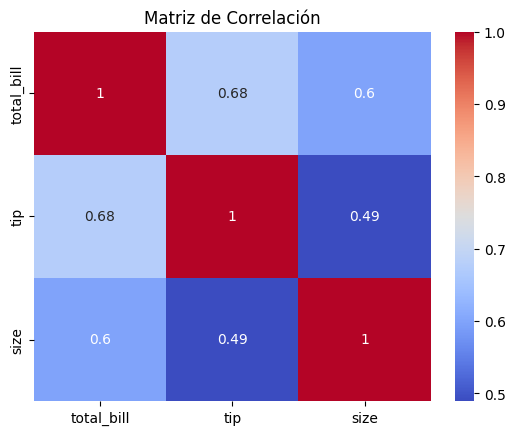

In [ ]:
#8.Cruzar variables numéricas para identificar relaciones fuertes.
numeric_df = df.select_dtypes(include=['number']) # Seleccionar solo columnas numéricas
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

plt.show()


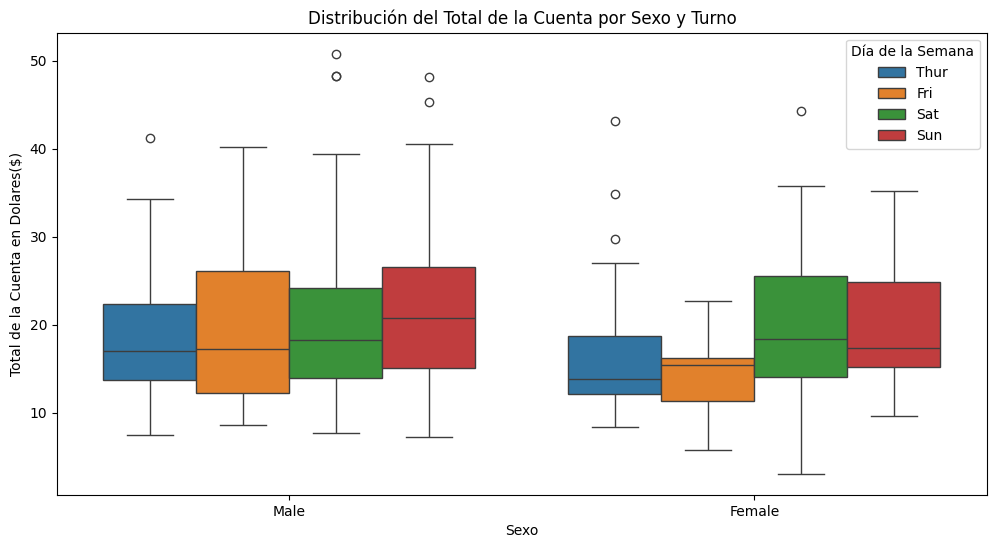

In [ ]:
#9.comparar la distribución del total según el sexo y día para entender mejor comportamientos específicos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='total_bill', hue='day', data=df)
plt.title('Distribución del Total de la Cuenta por Sexo y Turno')
plt.xlabel('Sexo')
plt.ylabel('Total de la Cuenta en Dolares($)')
plt.legend(title='Día de la Semana')
plt.show()

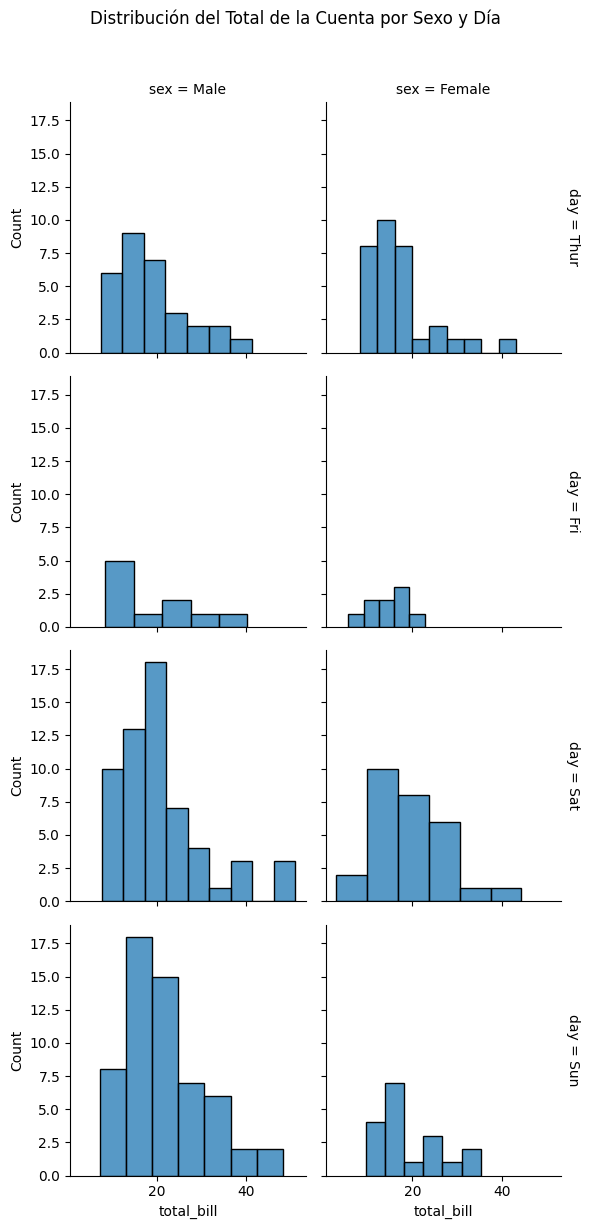

In [ ]:
#10.crear una grilla personalizada para observar múltiples relaciones entre variables.
g = sns.FacetGrid(df, col='sex', row='day', margin_titles=True)
g.map(sns.histplot, 'total_bill')
plt.suptitle('Distribución del Total de la Cuenta por Sexo y Día', y=1.02)
plt.tight_layout()
plt.show()